In [ ]:
pip install split-folders

In [ ]:
https://www.kaggle.com/omkargurav/face-mask-dataset
https://medium.com/acm-juit/ssd-object-detection-in-real-time-deep-learning-and-caffe-f41e40eea968
https://www.kaggle.com/taha07/face-mask-detection-using-opencv-mobilenet

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import tensorflow_hub as hub
%matplotlib inline

# Split Dataset

In [4]:
#Split Data
import splitfolders
splitfolders.ratio('Dataset', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

# Prepare Data For Training

In [2]:
#Melihat Jumlah data traning dan testing
print('total train mask training images :', len(os.listdir('output/train/with_mask')))
print('total train non mask training images :', len(os.listdir('output/train/without_mask')))

print('total val mask training images :', len(os.listdir('output/val/with_mask')))
print('total val non mask training images :', len(os.listdir('output/val/without_mask')))

print('total test mask training images :', len(os.listdir('output/test/with_mask')))
print('total test non mask training images :', len(os.listdir('output/test/without_mask')))

total train mask training images : 2980
total train non mask training images : 3062
total val mask training images : 372
total val non mask training images : 382
total test mask training images : 373
total test non mask training images : 384


In [3]:
# Membuat Path Data Traning dan data testing kedalam variabel
train_dir = os.path.join('output/train')
val_dir = os.path.join('output/val')
test_dir = os.path.join('output/test')
#testing_dir = os.path.join('Data_Kurangi_Filter/Testing')

In [4]:
# Membuat array berisi nama class
class_names = ['mask', 'no mask']
print(class_names)

['mask', 'no mask']


In [5]:
# Augmentasi Gambar dengan imagedatagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.2)

In [6]:
# Augmentasi data traning
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(320, 320),
    batch_size=4,
    class_mode='categorical')

Found 6042 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

In [8]:
# Augmentasi Data Validasi
validation_generator = train_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(320, 320),
    batch_size=4,
    class_mode='categorical')

Found 754 images belonging to 2 classes.


In [9]:
validation_generator.class_indices

{'with_mask': 0, 'without_mask': 1}

## Model

In [11]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(weights = "imagenet",include_top = False,input_shape=(320,320,3))

for layer in mobilenet.layers:
    layer.trainable = False

In [12]:
# Pembuatan model
model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(2,activation="softmax"))

In [13]:
# Model Optimizer
model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adamax(learning_rate=0.001),metrics=['accuracy'])

In [14]:
# Traning model
epoch = 10
history = model.fit(train_generator,validation_data=validation_generator,epochs=epoch,verbose=2,steps_per_epoch=50,validation_steps=5)

Epoch 1/10
50/50 - 19s - loss: 2.0038 - accuracy: 0.8250 - val_loss: 6.9271e-04 - val_accuracy: 1.0000
Epoch 2/10
50/50 - 14s - loss: 0.2147 - accuracy: 0.9400 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 3/10
50/50 - 16s - loss: 0.2039 - accuracy: 0.9550 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 4/10
50/50 - 15s - loss: 0.0348 - accuracy: 0.9900 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 5/10
50/50 - 15s - loss: 0.1194 - accuracy: 0.9650 - val_loss: 0.4885 - val_accuracy: 0.9000
Epoch 6/10


C:\Users\satri\anaconda3\envs\Diabetic Renopaty\lib\site-packages\PIL\Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 - 14s - loss: 0.1531 - accuracy: 0.9700 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/10
50/50 - 15s - loss: 0.0835 - accuracy: 0.9900 - val_loss: 0.4599 - val_accuracy: 0.9000
Epoch 8/10
50/50 - 14s - loss: 0.1056 - accuracy: 0.9600 - val_loss: 7.2828e-04 - val_accuracy: 1.0000
Epoch 9/10
50/50 - 15s - loss: 0.0440 - accuracy: 0.9900 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 10/10
50/50 - 14s - loss: 0.1203 - accuracy: 0.9700 - val_loss: 0.0396 - val_accuracy: 1.0000


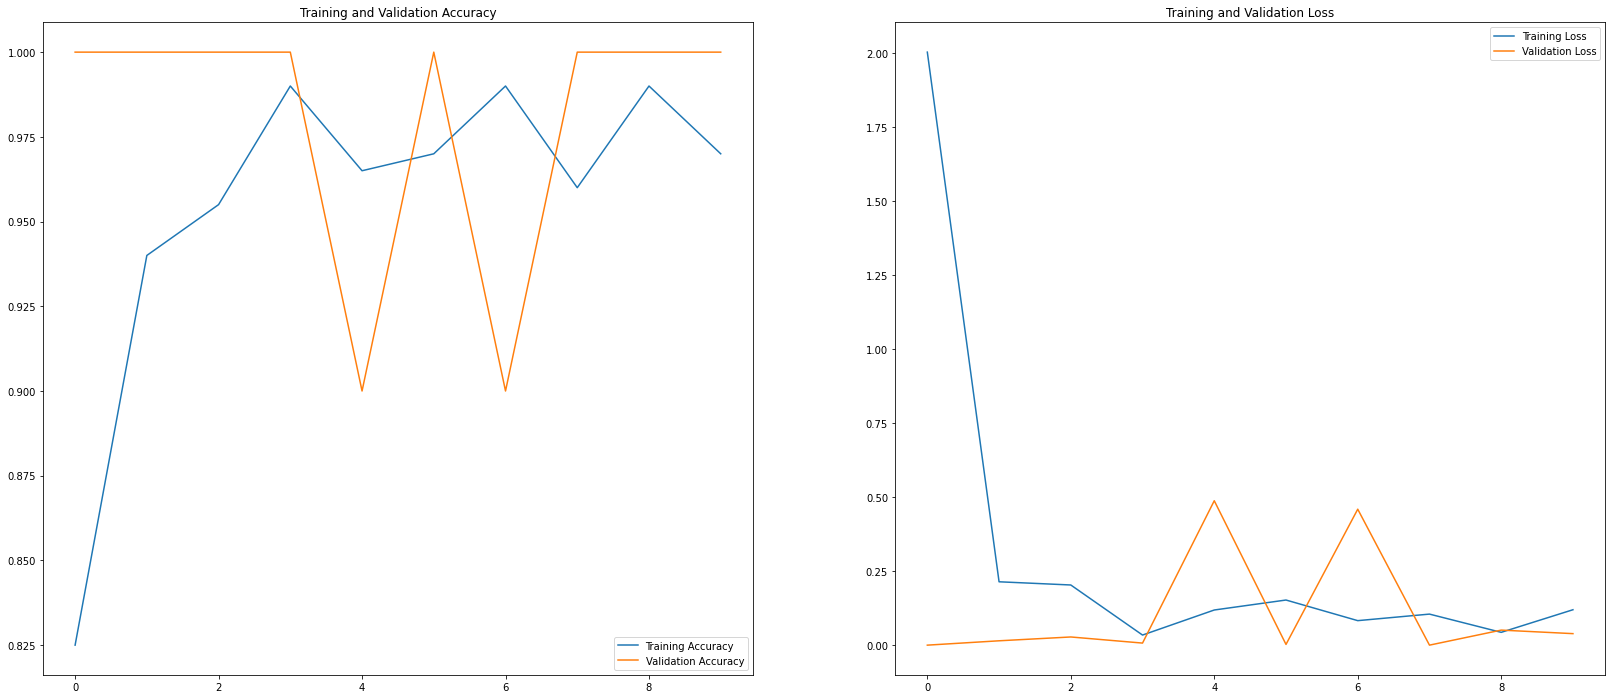

In [15]:
# Plot hasil Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(28, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
Testing_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
test_generator = Testing_datagen.flow_from_directory(
    test_dir,
    target_size=(320, 320),
    batch_size=4,
    class_mode='categorical') # set as training data

Found 757 images belonging to 2 classes.


In [18]:
test_accu = model.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

190/190 [==============================] - 35s 183ms/step - loss: 0.1499 - accuracy: 0.9709
The testing accuracy is : 97.09379076957703 %


In [19]:
# Save Model kedalam format h5
model.save('ModelMDMobileNet.h5')

C:\Users\satri\anaconda3\envs\Diabetic Renopaty\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
# Membuat prediksi
import keras
IMG_SIZE = 512

# Ambil data untuk di redict
Pred_Path = "Testing/diabetes/IDRiD_017.jpg"
Pred_result_Path = "Prediksi.png"

# Proses data yang akan di diprediksi
img = cv2.imread(Pred_Path)
img_process = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_process = cv2.resize(img_process, (IMG_SIZE, IMG_SIZE))
img_process = cv2.addWeighted(img_process,4, cv2.GaussianBlur(img_process , (0,0) , 40) ,-4 ,128)
cv2.imwrite(Pred_result_Path, img_process)

import keras

# Catatan Image Input yang diupload akan di proses terlebih dahulu agar sesuai dengan traning model"
# Sehingga pada saat predict gambar yang digunakan adalah file gambar upload yang telah di proses"

#Load Image Process dan bentuk kedalam array
img_plot = keras.preprocessing.image.load_img(Pred_Path, target_size=(150, 150))
img_pred = keras.preprocessing.image.load_img(Pred_result_Path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img_pred)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Prediksi hasil klassifikasi
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
imgplot = plt.imshow(img_plot)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)